#Librerias

In [7]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
!pip install --upgrade topojson
!pip install --upgrade plotly
#!pip install --upgrade pip

     |████████████████████████████████| 1.0 MB 18.7 MB/s 
     |████████████████████████████████| 6.3 MB 53.9 MB/s 
     |████████████████████████████████| 16.7 MB 399 kB/s 
     |████████████████████████████████| 44 kB 2.5 MB/s 
     |████████████████████████████████| 78 kB 6.2 MB/s 
     |████████████████████████████████| 28.8 MB 1.1 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from vega_datasets import data
from sklearn.model_selection import train_test_split
import itertools
import numpy as np
import pandas as pd
from google.colab import files 
import altair as alt
import geopandas as gpd
from plotly import express as px
import plotly.express as px

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

# Desnutrición Infantil en menores de 5 años.

In [9]:
pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(8,8)})

# Introducción:

* Se llama desnutrición a un estado patológico de distintos grados de severidad y con diferentes manifestaciones clínicas, causado por la asimilación deficiente de alimentos por el organismo.
* La desnutrición es un problema de salud que se deriva o se relaciona con diferentes factores tales como la capacidad económica, el ámbito social y las políticas públicas, entre otros.
* En caso de no tratarse a tiempo, puede comprometer la vida y la salud de la población en general a corto, mediano y largo plazo.

## ¿Qué?

La información tomada como base para el desarrollo de este proyecto proviene del reporte que realizaron las IPS de los casos confirmados de desnutrición aguda en menores de cinco (5) años durante el periodo comprendido entre enero de 2016 y diciembre de 2019. La base de datos contiene 22 variables categóricas y cuantitativas relacionadas de la siguiente manera:

* Edad: Edad del menor en meses. Variable ordenada cuantitativa secuencial desde 1 hasta 29.
* Sexo: Sexo del menor. Variable cualitativa ordenada, M si el menor es masculino y F si es femenino.
* crec_dllo: Controles de crecimiento y desarrollo. Variable ordena cualitativa, 1 si cuenta con controles de desarrollo y 2 si no.
* esq_vac: Si cuenta o no con esquema de vacunación. Variable de orden cualitativo, 1 si el individuo cuenta con esquema de vacunación, 2 si no y 3 si es desconocido.
* year_: Año de reporte del caso con diagnóstico de desnutrición aguda. Variable de orden cualitativo y secuencial entre el 2016 y 2019.



# ¿Por qué?

Se espera informar las edades segregadas por sexo donde se han reportado más casos de desnutrición en la ciudad de Medellín – Colombia, para considerar lo importante que el conocimiento de la información y así poder determinar si estas causas pueden afectar negativamente el desarrollo de la ciudad.

# ¿Cómo?

Se reestructura una base con 5 variables, como el crecimiento de desarrollo, edad, sexo, año de reporte y esquema de vacunación.
Marcas y Canales.
* Se consideran las marcas de color para diferenciar las variables de sexo, crecimiento de desarrollo y esquema de vacunación.
* Marcas de línea para asignar los valores en edades a cada sexo.
* Canal de posición espacial vertical y horizontal con el fin de realizar representaciones de cantidades de edad y respectivos promedios.
* Canal de color para realizar separación en sexo. 

## Objetivo.

Conocer las edades, sexo y los años de los reportes de los casos de desnutrición de la ciudad de Medellín.

In [10]:
uploaded = files.upload()


df_diabetic = pd.read_csv('sivigila_desnutricion (1).csv', 
                 sep = ';',
                 index_col=0, #index_col=False
                 error_bad_lines=False
                 );


Saving sivigila_desnutricion (1).csv to sivigila_desnutricion (1).csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_diabetic.head()

,semana,edad_,sexo_,comuna,tipo_ss_,cod_ase_,fec_con_,tip_cas_,pac_hos_,peso_nac,talla_nac,edad_ges,t_lechem,e_complem,crec_dllo,esq_vac,carne_vac,peso_act,talla_act,per_braqu,evento,year_,mes
id,,,,,,,,,,,,,,,,,,,,,,,
1,19,1,M,Doce de Octubre,S,CCF002,30/03/2016,4,2,2800,49,40,6,0,1,1,2,"8,5",79,0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016,5. MAYO
2,19,3,M,Doce de Octubre,S,CCF002,31/03/2016,4,2,2600,48,40,6,1,1,1,2,11,90,0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016,5. MAYO
3,27,2,M,Popular,S,CCF002,22/06/2016,4,2,2930,48,40,13,6,1,1,1,"8,6","81,6",0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016,7. JULIO
4,27,1,M,Villa Hermosa,C,EPS010,5/07/2016,4,2,2900,52,40,6,6,1,1,2,"7,5",72,0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016,7. JULIO
5,37,9,M,Belen,C,EPSS16,4/08/2016,4,1,3700,48,39,5,5,1,1,1,7,70,13,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016,10. OCTUBRE


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print('Base de datos de niños on desnutricion')
print('Filas: ', df_diabetic.shape[0])
print('Columnas: ', df_diabetic.shape[1])

Base de datos de niños on desnutricion
Filas:  2000
Columnas:  23


In [ ]:
df_NAs = df_diabetic == '?'
round((df_NAs.sum()/len(df_NAs))*100,4)

semana       0.0
edad_        0.0
sexo_        0.0
comuna       0.0
tipo_ss_     0.0
cod_ase_     0.0
fec_con_     0.0
tip_cas_     0.0
pac_hos_     0.0
peso_nac     0.0
talla_nac    0.0
edad_ges     0.0
t_lechem     0.0
e_complem    0.0
crec_dllo    0.0
esq_vac      0.0
carne_vac    0.0
peso_act     0.0
talla_act    0.0
per_braqu    0.0
evento       0.0
year_        0.0
mes          0.0
dtype: float64

In [ ]:
tab2 = df_diabetic['esq_vac'].value_counts().rename_axis('Asignacion').reset_index(name='Menores reportados')
tab2

,Asignacion,Menores reportados
0,1,1782
1,2,141
2,3,77


In [ ]:
tab22 = df_diabetic
tab22

,semana,edad_,sexo_,comuna,tipo_ss_,cod_ase_,fec_con_,tip_cas_,pac_hos_,peso_nac,talla_nac,edad_ges,t_lechem,e_complem,crec_dllo,esq_vac,carne_vac,peso_act,talla_act,per_braqu,evento,year_,mes
id,,,,,,,,,,,,,,,,,,,,,,,
1,19,1,M,Doce de Octubre,S,CCF002,30/03/2016,4,2,2800,49,40,6,0,1,1,2,"8,5",79,0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016,5. MAYO
2,19,3,M,Doce de Octubre,S,CCF002,31/03/2016,4,2,2600,48,40,6,1,1,1,2,11,90,0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016,5. MAYO
3,27,2,M,Popular,S,CCF002,22/06/2016,4,2,2930,48,40,13,6,1,1,1,"8,6","81,6",0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016,7. JULIO
4,27,1,M,Villa Hermosa,C,EPS010,5/07/2016,4,2,2900,52,40,6,6,1,1,2,"7,5",72,0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016,7. JULIO
5,37,9,M,Belen,C,EPSS16,4/08/2016,4,1,3700,48,39,5,5,1,1,1,7,70,13,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016,10. OCTUBRE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,26,1,M,SIN INFORMACION,S,EPS040,28/06/2019,4,2,3100,51,37,0,6,1,1,1,"7,9","74,4","14,5",DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2019,7. JULIO
1997,23,9,M,SIN INFORMACION,S,EPS040,6/06/2019,4,2,4000,53,42,0,8,2,2,1,"7,3",71,"13,8",DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2019,6. JUNIO
1998,41,6,M,SIN INFORMACION,S,EPS040,7/10/2019,4,2,2740,0,39,0,5,1,2,1,"5,7",68,14,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2019,10. OCTUBRE


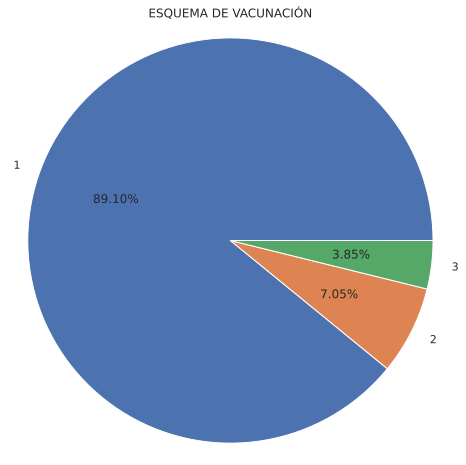

In [ ]:
fig1, ax1 = plt.subplots()

ax1.pie(tab2['Menores reportados'], 
        labels=tab2['Asignacion'],
        autopct='%1.2f%%',
        shadow=False,
        )
ax1.axis('equal')
plt.title('ESQUEMA DE VACUNACIÓN')
plt.show()

# Análisis de esquema de vacunación. 

* Se determina que en la población el 89.10% cuenta con esquema de vacunación, el 7.05% no y el 3.85 se desconoce.

In [ ]:
Corelacion = pd.crosstab(df_diabetic["edad_"],df_diabetic["sexo_"])
Corelacion

sexo_,F,M
edad_,,
1,207,361
2,145,242
3,122,184
4,114,147
5,27,38
6,33,40
7,26,39
8,24,35
9,24,44


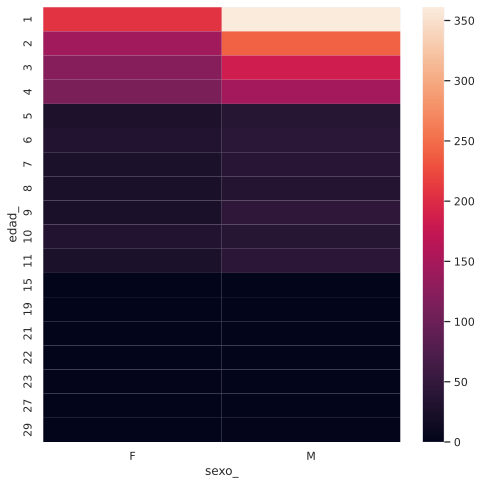

In [ ]:
ax = sns.heatmap(Corelacion)

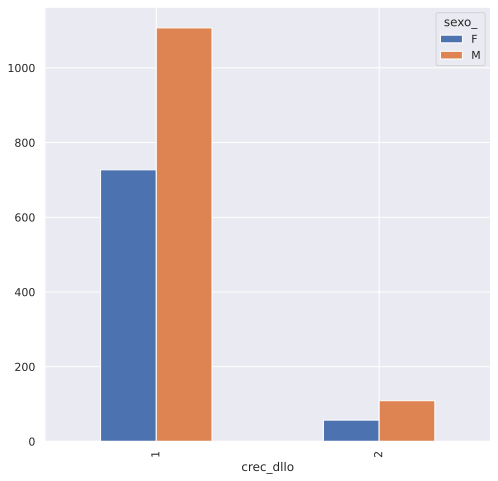

In [ ]:
group_sex = df_diabetic.groupby(['sexo_','crec_dllo']).count()['edad_']
(group_sex.unstack(level=0).plot.bar())
plt.show();

#Análisis de crecimiento de desarrollo por sexo.

* En este caso se considera que los niños que cuentan con control de crecimiento de desarrollo son los del sexo masculino por arriba de 1000 casos, en el caso de los que no cuentan con un control de crecimiento son los niños.


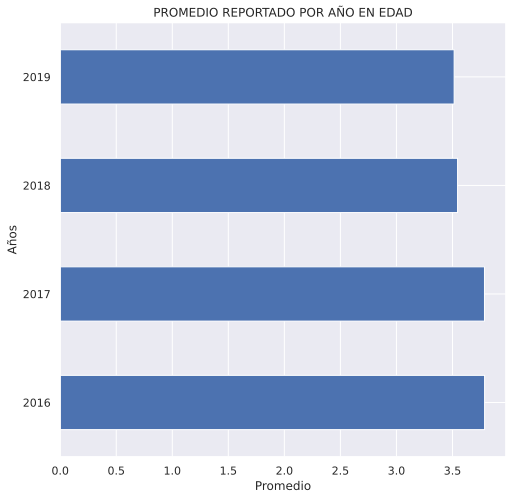

In [ ]:
valor_por_ciudad = df_diabetic.groupby("year_")["edad_"].mean()
valor_por_ciudad.head(10).plot.barh()
plt.xlabel(xlabel='Promedio')
plt.ylabel(ylabel='Años')
plt.title(label='PROMEDIO REPORTADO POR AÑO EN EDAD')
plt.show()

#Análisis de reportes en años del promedio de edad en meses.

* Según la grafica anterior el promedio de la edad reportada con caso de desnutrición para el año 2017 fue de más del 3.7 meses, considerado el más alto de los datos reportados.


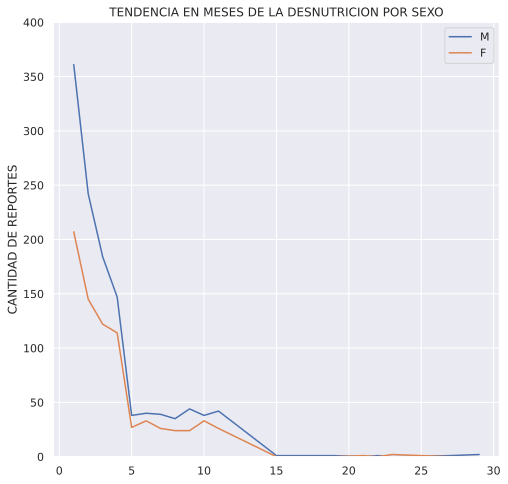

In [ ]:
fig,eje= plt.subplots()
for i in ['M','F']:
    eje.plot(Corelacion[i],label=i)
    eje.set_ylim(0,400)
    eje.legend()
    eje.set_ylabel('CANTIDAD DE REPORTES')
    eje.set_title('TENDENCIA EN MESES DE LA DESNUTRICION POR SEXO')

# Análisis de tendencia por sexo y edad.

* Se visualiza que el reporte por desnutrición semanal es mas alto el del sexo masculino, pero a medida que va aumentando la edad en meses este va disminuyendo.
* En el caso del sexo femenino se evidencia reportes altos al igual que el otro sexo a los primeros 5 meses de vida y a medida que pasa el tiempo los casos de desnutrición son más pocos.


# Graficas Temporales 


In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt

df_diabetic

df_diabetic.groupby(['peso_nac'])

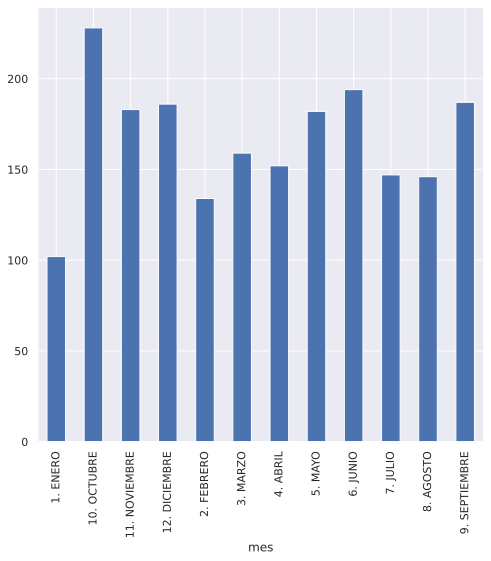

In [ ]:
df_diabetic.groupby('mes').count()["peso_nac"].plot(kind='bar')

#Graficas Espaciales


In [1]:
import folium as fl

In [42]:
df11 = pd.read_csv('sivigila_desnutricion (1) coordenadas.csv', 
                 sep=";", decimal=",",
                 index_col=0, #index_col=False
                 error_bad_lines=False
                 );
df11.head()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





,semana,edad_,sexo_,comuna,tipo_ss_,cod_ase_,fec_con_,tip_cas_,pac_hos_,peso_nac,talla_nac,edad_ges,t_lechem,e_complem,crec_dllo,esq_vac,carne_vac,peso_act,talla_act,per_braqu,evento,year_,mes,Longitud,Latitud,Ciudad
id,,,,,,,,,,,,,,,,,,,,,,,,,,
1,19,1,M,Doce de Octubre,S,CCF002,30/03/2016,4,2,2800,49.0,40,6,0,1,1,2,8.5,79.0,0.0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016,MAYO,6.301831,-75.579258,MEDELLIN
2,19,3,M,Doce de Octubre,S,CCF002,31/03/2016,4,2,2600,48.0,40,6,1,1,1,2,11.0,90.0,0.0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016,MAYO,6.301831,-75.579258,MEDELLIN
3,27,2,M,Popular,S,CCF002,22/06/2016,4,2,2930,48.0,40,13,6,1,1,1,8.6,81.6,0.0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016,JULIO,6.303366,-75.546594,MEDELLIN
4,27,1,M,Villa Hermosa,C,EPS010,5/07/2016,4,2,2900,52.0,40,6,6,1,1,2,7.5,72.0,0.0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016,JULIO,6.248220,-75.551500,MEDELLIN
5,37,9,M,Belen,C,EPSS16,4/08/2016,4,1,3700,48.0,39,5,5,1,1,1,7.0,70.0,13.0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016,OCTUBRE,6.231514,-75.591407,MEDELLIN


In [16]:
import plotly.express as px

fig = px.scatter_geo(df11,lat=["Latitud"], lon=["Longitud "], size_max=15)
fig.show()

In [54]:
fig = px.scatter_geo(df11, 
                     lat='Longitud ',
                     lon='Latitud', 
                     hover_name="comuna", 
                     projection="mercator")
fig.show()

In [45]:
fig = px.scatter_geo(df11, 
                     lat='Longitud ',
                     lon='Latitud', 
                     hover_name="Ciudad",
                     color="comuna",
                     size="peso_nac",
                     animation_frame="mes", 
                     center = {"lat": 6.2556, "lon": -75.5507},
                     projection="mercator")
fig.update_layout(
        title_text = 'Peso de recien nacidos en comunas de medellin',
        showlegend = True,
        geo = dict(
            scope = 'south america',
            landcolor = 'rgb(217, 217, 217)',
        )
    )
fig.show()

##Peso recien nacido 
El peso al nacer normal es crítico para la salud y el desarrollo futuro. Es un indicador, no solo de la salud de la madre biológica y el estado nutricional, sino también de las posibilidades de supervivencia de un recién nacido, su crecimiento, salud a largo plazo y desarrollo psicosocia

Este peso es de suma importancia, debido a que se tienen factores en cuenta en el periodo de gestacion y en el desarrollo del recien nacido fuera del vientre, cabe aclarar que el peso es respecto al sexo, al tiempo de gestacion entre otros, para determinar la probabilidad de que el recien nacido fallesca en los primeros 5 años de vida, que son los periodos que mas se ven fefunciones en niños. 



In [57]:
import plotly.graph_objects as go
px.set_mapbox_access_token("pk.eyJ1IjoicHJvZi10YXRpYW5hLWd1dGllcnJleiIsImEiOiJjbDFlNzduYWwwMTBoM2Rua3dqOXd2bHVjIn0.0UICEqjwrqPwqcg53HY9NA")

fig = px.scatter_mapbox(df11,
                        lat='Longitud ',
                        lon='Latitud',
                        hover_name='Ciudad',
                        zoom=3,
                        color="comuna",
                        size="talla_nac",
                        animation_frame="mes", 
                        center = {"lat": 6.2556, "lon": -75.5507})
fig.update_layout(
        title_text = 'Proceso de talla en recien nacidos por comuna',
        showlegend = True,
        geo = dict(
            scope = 'south america',
            landcolor = 'rgb(217, 217, 217)',
        )
    )
fig.show()

##Seleccion
  El proceso de seleccion de las gradicas espaciales se dieron por medio de un conjunto de coordenadas especificadas por comuna de la ciudad de medellin, no es extraño encontrarse en diferentes medios casos de muertes de niños por desnutricion, uno de los factores para determinar si el bebe tiene factores de desnutricion es por medio de la talla al nacimiento, que queire decir esto: 

  Los hospitales o los centros donde nace el feto toman ciertas factores en cuenta para saber la terminacion del feto en periodo de gestacion por la madre, la medida mas utilizada es el peso y la talla del feto a la hora de nacer, debido a estos datos se puede inferir si el recien nacido tiene probabilidad de sufrir desnutricion, el tallaje se toma de talon a cabeza.

  Es importante conocer estos temas con sstentacion cientifica, tanto analitica como medica, para determinar y con ello dar a conocer diferentes problematicas, culturales, sociales, politicas entre otras. El incremento de estas muertes genera gran desconcierto de las politicas publicas aplicadas, en este caso por todos los organismos publicos de las regiones.

  En conclusion podemos observar el cambio en la variabe tall con respecto al tiempo, en nuestro caso por meses, esto con el objetivo de visualizar mejor, como es el cambio de las comunas respecto a la talla al nacer del recien nacido.
  

In [56]:
fig = px.line_geo(df11, 
                     lat='Longitud ',
                     lon='Latitud', 
                     hover_name="comuna",
                     projection='mercator',
                     center = {"lat": 6.2556, "lon": -75.5507})
fig.update_layout(
        title_text = 'Proceso de comparacion de comunas',
        showlegend = True,
        geo = dict(
            scope = 'south america',
            landcolor = 'rgb(217, 217, 217)',
        )
    )
fig.show()